Interpolant els resultats d'un llit elàstic, per poder posar a l'èbola la funcio i les dues primeres derivades

Aquest exemple usa els resultats de l'òptim de les dades 1 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
folder = "EL=140.712415711-TI=1.42203583964"

In [3]:
llit = np.load("Function-Results/"+folder+"/tensor.npy")

In [4]:
llit.shape

(218, 154, 3)

In [5]:
llit[0,0]

array([-2.2, -1.3,  0. ])

In [6]:
from scipy.interpolate import interp2d

In [7]:
x = llit[:,:,0]
y = llit[:,:,1]
z = llit[:,:,2]

In [8]:
import scipy

In [10]:
%%time 
def g(s):
    if s < 0:
        return g(-s)
    p = scipy.interpolate.bisplrep(x, y, z, s = s)
    o = lambda i,j: scipy.interpolate.bisplev(llit[i,j,0],llit[i,j,1],p)
    aux = np.zeros(x.shape)
    for i in range(len(aux)):
        for j in range(len(aux[0])):
            aux[i,j] = o(i,j)
    ipp = np.linalg.norm(aux-z)
    return ipp

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


In [ ]:
import time
for i in range(1,10):
    s = 10**(-i)
    print(s)
    t0 = time.time()
    d = g(s)
    print(d,time.time()-t0)

0.1
0.316338242416 1.3224294185638428
0.01
0.100000446318 3.0884311199188232
0.001
0.0316148643848 7.59289813041687
0.0001
0.0100029571159 17.651944637298584
1e-05
0.00316222303104 41.28553581237793
1e-06
0.0010000733961 73.23258209228516
1e-07


In [13]:
scipy.optimize.minimize(g, method = 'nelder-mead', x0 = 0.01)

[ 0.01]
-> 0.100000446318
[ 0.0105]
-> 0.102474901923
[ 0.0095]
-> 0.0974677421207
[ 0.009]
-> 0.0948672270965
[ 0.008]
-> 0.0894870885822
[ 0.007]
-> 0.0836702792455
[ 0.005]


KeyboardInterrupt: 

In [11]:
g(2)

1.4142605228589624

In [ ]:
g(0)

-0.034477253250061402

In [43]:
llit[1,2,2]

-0.026898672552421163

In [ ]:
%%time
f = interp2d(x, y, z, kind='cubic')

In [ ]:
#PLOT A SURFACE
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure('Llit')
ax = fig.gca(projection='3d')
fig.suptitle("Llit elàstic")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
ax.set_zlabel('Height (meters)')
ax.set_zlim(-1,0.1)

surf = ax.plot_surface(llit[:,:,0], llit[:,:,1], llit[:,:,2], antialiased=True)


In [34]:
aux = np.zeros(llit[:,:,0].shape)
for i in range(len(aux)):
    for j in range(len(aux[0])):
        aux[i,j] = f(llit[i,j,0], llit[i,j,1])

In [40]:
np.max(abs(aux-llit[:,:,2]))

2.2666325313169811e-05

<IPython.core.display.Javascript object>


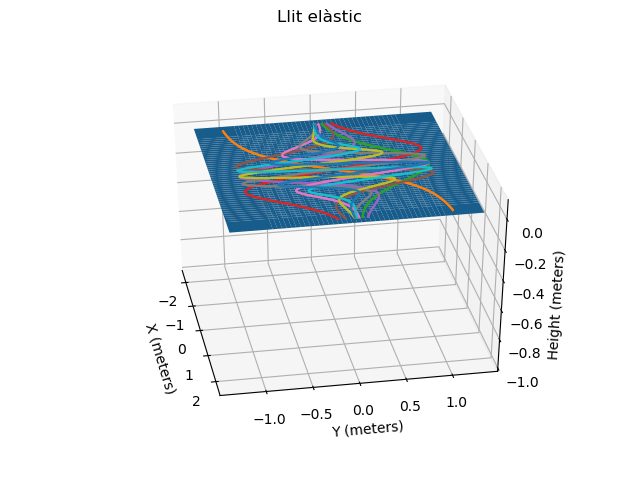

In [37]:
#PLOT A SURFACE
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure('Llit')
ax = fig.gca(projection='3d')
fig.suptitle("Llit elàstic")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
ax.set_zlabel('Height (meters)')
ax.set_zlim(-1,0.1)

surf = ax.plot_surface(llit[:,:,0], llit[:,:,1], abs(aux-llit[:,:,2]), antialiased=True)


In [27]:
np.linalg.norm(llit[:,:,2]-aux)

0.00010248563967730256

In [43]:
np.gradient?

In [52]:
llit[:,:,0]

array([[-2.2       , -2.2       , -2.2       , ..., -2.2       ,
        -2.2       , -2.2       ],
       [-1.8       , -1.80050426, -1.80052828, ..., -1.80052369,
        -1.80049979, -1.8       ],
       [-1.78325581, -1.78375358, -1.78377662, ..., -1.78377102,
        -1.78374814, -1.78325581],
       ..., 
       [ 1.78325581,  1.78377743,  1.78380134, ...,  1.78379616,
         1.78377239,  1.78325581],
       [ 1.8       ,  1.80052666,  1.80055152, ...,  1.80054733,
         1.80052258,  1.8       ],
       [ 2.2       ,  2.2       ,  2.2       , ...,  2.2       ,
         2.2       ,  2.2       ]])

In [53]:
llit[:,:,0].shape

(218, 154)

In [54]:
aux.shape

(218, 154)

In [51]:
%%time 
np.gradient(aux, llit[:,:,0], llit[:,:,1])

ValueError: distances must be either scalars or match the length of the corresponding dimension

In [62]:
import numdifftools as nd

In [73]:

>>> import numdifftools.nd_algopy as nda
>>> xdata = np.reshape(np.arange(0,1,0.1),(-1,1))
>>> ydata = 1+2*np.exp(0.75*xdata)
>>> fun = lambda c: (c[0]+c[1]*np.exp(c[2]*xdata) - ydata)**2
>>> Jfun = nda.Jacobian(f, method='reverse')


In [74]:
np.abs(Jfun([1,2,0.75])) # should be numerically zero


TypeError: __call__() missing 1 required positional argument: 'y'

In [56]:
!pip install numdifftools

    100% |████████████████████████████████| 3.2MB 507kB/s ta 0:00:011
    100% |████████████████████████████████| 194kB 3.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for algopy ... done
  Stored in directory: /home/pau/.cache/pip/wheels/6d/84/41/a6dbdd08b74835e79671c1cae2c67d157a4e9b57d60770f15a
Successfully built algopy


In [60]:
%matplotlib inline

>>> import numpy as np
>>> import numdifftools as nd
>>> import matplotlib.pyplot as plt
>>> x = np.linspace(-2, 2, 100)
>>> for i in range(10):
...    df = nd.Derivative(np.tanh, n=i)
...    y = df(x)
...    h = plt.plot(x, y/np.abs(y).max())


SyntaxError: invalid syntax (<ipython-input-60-c10ff896aba3>, line 3)